# K Nearest Neighbors

Data set contains coded features: XVPM, GWYH, TRAT, TLLZ, IGGA, HYKR, EDFS, GUUB, MGJM, JHZC, TARGET CLASS and simulates a task given by some company that wants to hide their bussiness information, but is interested in classifying data into one of two possible categories.

After examining cross-correlation between features, data is scaled, because of the nature of KNN algorithm. It is then splitted into training and testing set, with 7:3 ratio. Initial KNN model has value 1 for the number of neighbors. After training of the data and prediction of the values from the testing set, classification report and confusion matrix are used for evaluating the model. Then, 40 values are tried out for the number of neighbors (1 to 40) and with every value, new model was created and data was fitted and predicted. For every value, average error is calculated and at the end the K-value with the lowest error was chosen. Data is again trained with only the best value, predictions are done on the testing set and classification report and confusion matrix are created for model evaluation.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/KNN-projects/master/KNN_Project_Data')
data

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [5]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
data.shape

(1000, 11)

In [7]:
data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [ ]:
#There is no null values . we are good to preceed
#Remember one if in dataset float value give it means that is continious variable

In [ ]:
#Lts check frequency using value counts

In [10]:
data['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

In [ ]:
#lets plot it graph

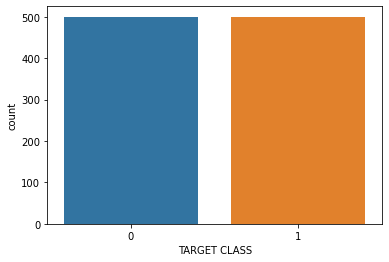

In [11]:
sns.countplot(x='TARGET CLASS',data=data)
plt.show()

In [ ]:
#Lets Select Best Feature using SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
x=data.drop('TARGET CLASS',axis=1)
y=data['TARGET CLASS']

In [14]:
feature_select=SelectKBest(score_func=f_classif,k=5)
fit=feature_select.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)
best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
best_feature.nlargest(5,'Score')

,Feature,Score
2,TRAT,314.226772
1,GWYH,209.057015
9,JHZC,99.955548
4,IGGA,95.405638
6,EDFS,85.961107


In [15]:
df=data[['TRAT','GWYH','JHZC','IGGA','EDFS']]
df.head(2)

,TRAT,GWYH,JHZC,IGGA,EDFS
0,2565.995189,817.988525,845.136088,550.417491,2147.641254
1,2644.141273,577.587332,861.081809,1161.873391,853.404981


In [ ]:
#We finded best feature now we have to building a model
#Lets importing model building libraries

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [18]:
scaler=StandardScaler()

In [19]:
x_scaled=scaler.fit_transform(x)

In [20]:
x_scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=45678)

In [23]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print('==================Training Data====================')
        print(f"Accuracy Score ==>{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=cnn.predict(x_test)
        print("==================Testing Score======================")
        print(f"Accuracy Score ===>{accuracy_score(y_test,pred)*100:.2f}%")
        print(f"Classification Report===>{classification_report(y_test,pred)}")

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)

==================Training Data====================
Accuracy Score ==>87.07%


In [28]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

==================Testing Score======================
Accuracy Score ===>80.80%
Classification Report===>              precision    recall  f1-score   support

           0       0.82      0.79      0.81       126
           1       0.80      0.82      0.81       124

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



In [ ]:

#Check Model is overfitted or not using crossvalidation kfold method

In [29]:
from sklearn.model_selection import KFold,cross_val_score

In [30]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=2).mean()*100

80.5

In [ ]:
#Great Our Model is not overfitted . We are good to proceed .
#Lets Use hyperparameter tuning
#Import

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
best_param={'algorithm':['kd_tree','brute'],
           'leaf_size':[3,5,4,7,8],
           'n_neighbors':[8,9,7,4,5,6,4]}

In [33]:
grid_search=GridSearchCV(estimator=knn,param_grid=best_param)

In [34]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 4, 7, 8],
                         'n_neighbors': [8, 9, 7, 4, 5, 6, 4]})

In [35]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [36]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=8)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=8)

In [38]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)

==================Training Data====================
Accuracy Score ==>85.20%


In [39]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

==================Testing Score======================
Accuracy Score ===>82.00%
Classification Report===>              precision    recall  f1-score   support

           0       0.80      0.86      0.83       126
           1       0.84      0.78      0.81       124

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



In [ ]:
#When you are are trying to make model .using different k values. and select mode feature for make model.